In [2]:
pip install scikit-learn numpy pandas matplotlib pickle-mixin


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/167.0 kB ? eta -:--:--
     ------- -------------------------------- 30.7/167.0 kB ? eta -:--:--
     -------------------------------------- 167.0/167.0 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/7.8 MB ? eta -:--:--
    --------------------------------------- 0.1/7.8 MB 2.4 MB/s eta 0:00:04
    --------------------------------------- 0.2/7.8 MB 2.0 MB/s eta 0:00:04
   - -------------------------------------- 0.2/7.8 MB 1.7 MB/s eta 0:00:05
   - --------


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
bin_data = pd.read_csv('C:/Files/Main Project/First Phase/Dataset/bin_data.csv')
bin_data.drop(bin_data.columns[0], axis=1, inplace=True)

In [ ]:
# Random Forest ( Binary Classification)

In [1]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pickle
import numpy as np
import pandas as pd
from os import path

# Load the dataset
bin_data = pd.read_csv('datasets/bin_data.csv')
bin_data.drop(bin_data.columns[0], axis=1, inplace=True)

# Load the label classes
le1_classes_ = np.load('labels/le1_classes.npy', allow_pickle=True)

# Prepare data for training and testing
X = bin_data.iloc[:, 0:93].to_numpy()  # Features
Y = bin_data['intrusion']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Setting up the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)  # Train the model

# Save the trained model to disk if it doesn't already exist
pkl_filename_rf = "./models/rf_classifier_binary.pkl"
if not path.isfile(pkl_filename_rf):
    with open(pkl_filename_rf, 'wb') as file:
        pickle.dump(rf_classifier, file)
    print("Saved Random Forest model to disk")

# Load the trained model from disk
with open(pkl_filename_rf, 'rb') as file:
    rf_classifier = pickle.load(file)
print("Loaded Random Forest model from disk")

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy
ac_rf = accuracy_score(y_test, y_pred_rf) * 100
print("Random Forest Classifier Binary Set-Accuracy is", ac_rf)

# Generate classification report
print(classification_report(y_test, y_pred_rf, target_names=le1_classes_))


FileNotFoundError: [Errno 2] No such file or directory: 'datasets/bin_data.csv'

# **Linear Support Vector Machine Classifier (Binary Classification)**

In [9]:
# importing library for support vector machine classifier
from sklearn.svm import SVC

In [10]:
X = bin_data.iloc[:,0:93].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data['intrusion'] # target attribute

In [11]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) 

In [ ]:
# using kernel as linear 
lsvm = SVC(kernel='linear',gamma='auto')        
lsvm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='linear')

In [14]:
pkl_filename = "./models/lsvm_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm, file)
  print("Saved model to disk")
  # loading the trained model from disk
  with open(pkl_filename, 'rb') as file:
    lsvm = pickle.load(file)
  print("Loaded model from disk") 

Saved model to disk
Loaded model from disk


In [15]:
y_pred = lsvm.predict(X_test) # predicting target attribute on testing dataset
ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LSVM-Classifier Binary Set-Accuracy is ", ac)

LSVM-Classifier Binary Set-Accuracy is  96.69460849685655


In [16]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1_classes_))

              precision    recall  f1-score   support

    abnormal       0.97      0.96      0.96     14720
      normal       0.96      0.97      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494



# **Auto Encoder Classifier (Binary Classification)**

In [23]:
pip install tensorflow


  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.28.3-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.67.1-cp311-cp311-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached numpy-2.0.2-cp311-cp311-win_amd64.whl.metadata (59 kB)
  Using cached ml_dtypes-0.4.1-cp311-cp311-win_amd64.whl.met

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
accelerate 0.32.1 requires numpy<2.0.0,>=1.17, but you have numpy 2.0.2 which is incompatible.
thinc 8.2.5 requires numpy<2.0.0,>=1.19.0; python_version >= "3.9", but you have numpy 2.0.2 which is incompatible.
transformers 4.42.3 requires numpy<2.0,>=1.17, but you have numpy 2.0.2 which is incompatible.

[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ------ -------------------------------- 66.8/390.2 MB 613.0 kB/s eta 0:08:48
   ------ -------------------------------- 66.8/390.2 MB 613.0 kB/s eta 0:08:48
   ------ -------------------------------- 66.8/390.2 MB 613.0 kB/s eta 0:08:48
   ------ -------------------------------- 66.8/390.2 MB 611.3 kB/s eta 0:08:50
   ------ -------------------------------- 66.9/390.2 MB 610.2 kB/s eta 0:08:50
   ------ -------------------------------- 66.9/390.2 MB 609.6 kB/s eta 0:08:51
   ------ -------------------------------- 66.9/390.2 MB 608.5 kB/s eta 0:08:52
   ------ -------------------------------- 66.9/390.2 MB 608.5 kB/s eta 0:08:52
   ------ -------------------------------- 66.9/390.2 MB 607.3 kB/s eta 0:08:53
   ------ -------------------------------- 66.9/390.2 MB 606.8 kB/s eta 0:08:53
   ------ -------------------------------- 66.9/390.2 MB 605.1 kB/s eta 0:08:55
   ------ -------------------------------- 67.0/390.2 MB 603.4 kB/s eta 0:08:56
   ------ -----------------------------

In [19]:
pip install keras

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     --------------------------------- ------ 41.0/48.7 kB 1.9 MB/s eta 0:00:01
     ---------------------------------------- 48.7/48.7 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.2 MB 3.0 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.2 MB 3.5 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.2 MB 3.7 MB/s eta 0:00:01
   --------------------- ------------------ 0.6/1.2 MB 3.7 MB/s eta 0:00:01
   --------------------------- ------------ 0.8/1.2 MB 3.7 MB/s eta 0:00:01
   ---------------------------------- ----- 1.0/1.2 MB 3.8 MB/s eta 0:00:01
   ---------------------------------------  1.2/1.2 MB 3.8 MB/s eta 0:00:01
   -----------------------------------


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from keras.layers import Input
from keras.models import Model

In [ ]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test = train_test_split(bin_data, test_size=0.25, random_state=42)

In [ ]:
# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_train = X_train.drop(['intrusion','abnormal','normal','label'],axis=1) 

y_test = X_test['intrusion'] # target attribute

# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_test = X_test.drop(['intrusion','abnormal','normal','label'],axis=1)

In [ ]:
X_train = X_train.values
X_test = X_test.values
y_test = y_test.values

In [ ]:
input_dim = X_train.shape[1]
encoding_dim = 50

#input layer
input_layer = Input(shape=(input_dim, ))
#encoding layer with 50 neurons
encoder = Dense(encoding_dim, activation="relu")(input_layer)           
#decoding and output layer
output_layer = Dense(input_dim, activation='softmax')(encoder)

In [ ]:
# creating model with input, encoding, decoding, output layers
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
# summary of model layers
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 93)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                4700      
_________________________________________________________________
dense_5 (Dense)              (None, 93)                4743      
Total params: 9,443
Trainable params: 9,443
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model on training dataset
history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

Epoch 1/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1214 - accuracy: 0.0525 - val_loss: 0.1063 - val_accuracy: 0.4071
Epoch 2/100
189/189 [==============================] - 1s 3ms/step - loss: 0.1056 - accuracy: 0.6072 - val_loss: 0.1051 - val_accuracy: 0.6891
Epoch 3/100
189/189 [==============================] - 1s 3ms/step - loss: 0.1048 - accuracy: 0.7082 - val_loss: 0.1049 - val_accuracy: 0.7015
Epoch 4/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1048 - accuracy: 0.7324 - val_loss: 0.1048 - val_accuracy: 0.7213
Epoch 5/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1046 - accuracy: 0.7678 - val_loss: 0.1047 - val_accuracy: 0.8029
Epoch 6/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1043 - accuracy: 0.8180 - val_loss: 0.1047 - val_accuracy: 0.8578
Epoch 7/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1044 - accuracy: 0.8400 - val_loss: 0.1047 - val_accuracy: 0.8321

In [ ]:
filepath = './models/ae_binary.json'
weightspath = './weights/ae_binary.h5'
if (not path.isfile(filepath)): 
  # serialize model to JSON
  autoencoder_json = autoencoder.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(autoencoder_json)

  # serialize weights to HDF5
  autoencoder.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  autoencoder = model_from_json(loaded_model_json)

  # load weights into new model
  autoencoder.load_weights(weightspath)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

985/985 [==============================] - 1s 1ms/step - loss: 0.1044 - accuracy: 0.9203
Test results - Loss: 0.10457229614257812 - Accuracy: 0.9226519465446472%


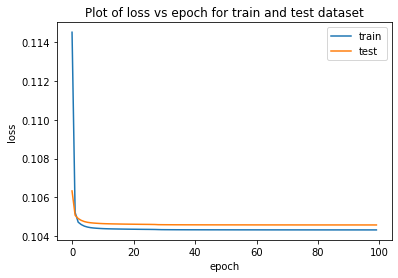

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('plots/ae_binary_loss.png')
plt.show()

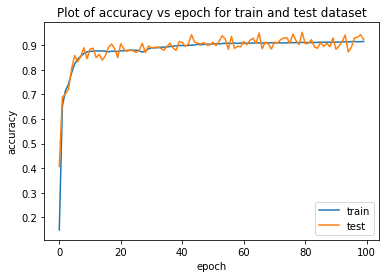

In [ ]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/ae_binary_accuracy.png')
plt.show()

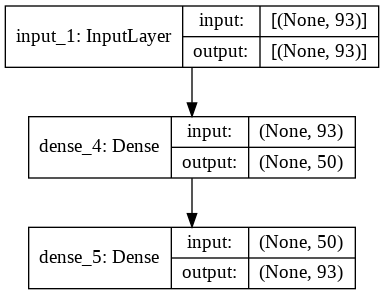

In [ ]:
# representation of model layers
plot_model(autoencoder, to_file='plots/ae_binary.png', show_shapes=True,)

In [ ]:
# calculating reconstruction error 
predictions = autoencoder.predict(X_test)

In [ ]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [ ]:
error_df.describe()

,reconstruction_error,true_class
count,31494.000000,31494.000000
mean,0.104572,0.532609
std,0.043577,0.498943
min,0.040633,0.000000
25%,0.074506,0.000000
50%,0.083821,1.000000
75%,0.151405,1.000000
max,0.229802,1.000000


# **Long Short-Term Memory Classifier (Binary Classification)**

In [ ]:
# importing library for LSTM layers
from keras.layers import LSTM

In [ ]:
X = bin_data.iloc[:,0:93] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data[['intrusion']].values # target attribute

In [ ]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [ ]:
X_train = X_train.to_numpy()

In [ ]:
x_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [ ]:
lst = Sequential() # initializing model

# input layer and LSTM layer with 50 neurons
lst.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
# outpute layer with sigmoid activation
lst.add(Dense(1, activation='sigmoid'))

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# summary of model layers
lst.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 93, 50)            10400     
_________________________________________________________________
dense_1 (Dense)              (None, 93, 1)             51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model on training dataset
history = lst.fit(x_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
16/16 [==============================] - 29s 2s/step - loss: 0.6915 - accuracy: 0.5119 - val_loss: 0.6863 - val_accuracy: 0.5798
Epoch 2/100
16/16 [==============================] - 26s 2s/step - loss: 0.6487 - accuracy: 0.6194 - val_loss: 0.4693 - val_accuracy: 0.8163
Epoch 3/100
16/16 [==============================] - 25s 2s/step - loss: 0.4611 - accuracy: 0.8119 - val_loss: 0.4278 - val_accuracy: 0.8231
Epoch 4/100
16/16 [==============================] - 25s 2s/step - loss: 0.4374 - accuracy: 0.8158 - val_loss: 0.4351 - val_accuracy: 0.8118
Epoch 5/100
16/16 [==============================] - 25s 2s/step - loss: 0.4359 - accuracy: 0.8105 - val_loss: 0.4117 - val_accuracy: 0.8281
Epoch 6/100
16/16 [==============================] - 25s 2s/step - loss: 0.4162 - accuracy: 0.8260 - val_loss: 0.4076 - val_accuracy: 0.8300
Epoch 7/100
16/16 [==============================] - 25s 2s/step - loss: 0.4156 - accuracy: 0.8265 - val_loss: 0.4064 - val_accuracy: 0.8305
Epoch 8/100
1

In [ ]:
x_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
filepath = './models/lst_binary.json'
weightspath = './weights/lst_binary.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  lst_json = lst.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(lst_json)

  # serialize weights to HDF5
  lst.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  lst = model_from_json(loaded_model_json)

  # load weights into new model
  lst.load_weights(weightspath)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = lst.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 [==============================] - 10s 10ms/step - loss: 0.3087 - accuracy: 0.8306
Test results - Loss: 0.3086586892604828 - Accuracy: 83.05730819702148%


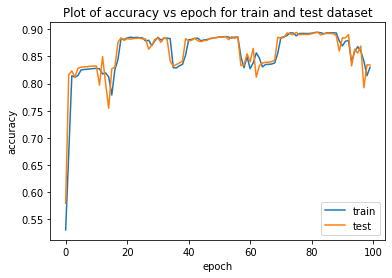

In [ ]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/lstm_binary_accuracy.png')
plt.show()

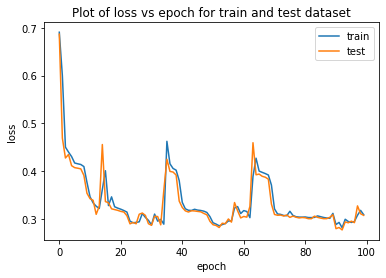

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/lstm_binary_loss.png')
plt.show()

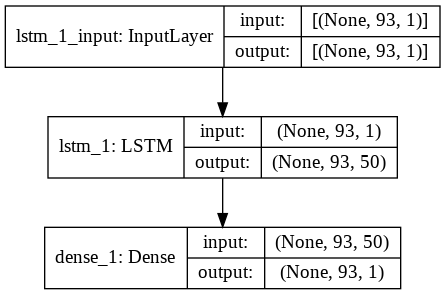

In [ ]:
# representation of model layers
plot_model(lst, to_file='plots/lstm_binary.png', show_shapes=True,)